In [1]:
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import os
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from collections import Counter 
import matplotlib.pyplot as plt



In [3]:
dfmerge = pd.read_csv("/content/gdrive/My Drive/finalmerge.csv",index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
dfmerge.describe()

,Unnamed: 0_x,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Unnamed: 0_y,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,time_x,Unnamed: 0.1,windspeedKmph_y,winddirDegree_y,weatherCode_y,precipMM_y,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,time_y
count,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06,1.815405e+06
mean,2.201694e+05,2.515150e+00,2.016494e+03,6.544028e+00,1.576547e+01,1.318193e+03,1.999537e-01,1.297760e+03,1.398036e+01,1.273796e+04,1.273937e+04,1.475983e+03,1.476221e+03,2.089705e-01,1.423142e+01,3.691335e+02,1.254870e+01,1.885540e+02,1.456484e+02,2.630467e-01,9.501128e+00,1.016012e+03,4.168825e+01,4.946636e+01,1.688418e+01,6.604433e+01,6.476720e+01,6.210289e+01,1.476221e+03,3.673489e+02,1.230411e+01,1.865897e+02,1.462245e+02,2.550000e-01,9.418141e+00,1.016167e+03,4.280911e+01,4.934882e+01,1.661847e+01,6.527912e+01,6.387153e+01,6.345448e+01,1.297760e+03
std,1.449516e+05,1.104474e+00,4.999603e-01,3.396029e+00,8.790736e+00,5.166970e+02,3.999654e-01,5.026491e+02,4.148781e+01,1.354192e+03,1.356409e+03,5.528555e+02,5.348307e+02,4.065734e-01,4.142203e+01,2.110346e+02,6.471354e+00,8.603604e+01,6.990671e+01,1.004745e+00,1.722554e+00,6.315331e+00,3.932331e+01,1.611147e+01,9.024073e+00,1.710963e+01,1.893322e+01,2.252080e+01,5.348307e+02,2.110373e+02,6.508047e+00,8.698118e+01,6.996480e+01,9.781583e-01,1.861534e+00,6.315904e+00,3.971353e+01,1.615241e+01,8.993893e+00,1.715484e+01,1.906687e+01,2.245897e+01,5.026491e+02
min,0.000000e+00,1.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.039700e+04,1.039700e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.810000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+02,0.000000e+00,0.000000e+00,9.840000e+02,0.000000e+00,-1.500000e+01,1.000000e+00,-1.000000e+01,-2.500000e+01,3.000000e+00,0.000000e+00
25%,9.091400e+04,2.000000e+00,2.016000e+03,4.000000e+00,8.000000e+00,9.040000e+02,0.000000e+00,9.000000e+02,0.000000e+00,1.129800e+04,1.129800e+04,1.059000e+03,1.100000e+03,0.000000e+00,0.000000e+00,1.860000e+02,8.000000e+00,1.240000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.600000e+01,5.400000e+01,4.700000e+01,1.100000e+03,1.840000e+02,7.000000e+00,1.200000e+02,1.130000e+02,0.000000e+00,1.000000e+01,1.012000e+03,0.000000e+00,3.800000e+01,1.000000e+01,5.500000e+01,5.300000e+01,4.800000e+01,9.000000e+02
50%,2.067500e+05,3.000000e+00,2.016000e+03,7.000000e+00,1.600000e+01,1.314000e+03,0.000000e+00,1.300000e+03,0.000000e+00,1.289200e+04,1.289200e+04,1.523000e+03,1.500000e+03,0.000000e+00,0.000000e+00,3.710000e+02,1.200000e+01,1.970000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.300000e+01,5.200000e+01,1.500000e+01,6.700000e+01,6.700000e+01,6.600000e+01,1.500000e+03,3.690000e+02,1.100000e+01,1.950000e+02,1.160000e+02,0.000000e+00,1.000000e+01,1.016000e+03,3.500000e+01,5.100000e+01,1.500000e+01,6.600000e+01,6.600000e+01,6.700000e+01,1.300000e+03
75%,3.458240e+05,3.000000e+00,2.017000e+03,9.000000e+00,2.300000e+01,1.736000e+03,0.000000e+00,1.700000e+

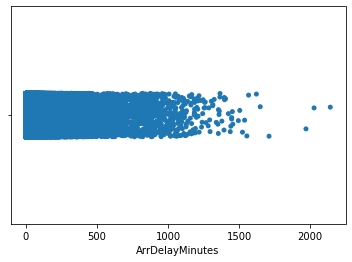

In [0]:
sns.stripplot(x="ArrDelayMinutes", data=dfmerge)

In [5]:
X=dfmerge.drop(["DepTime",
                "DepDel15",
                "DepDelayMinutes",
                "ArrDelayMinutes",
                "ArrTime",
                "ArrDel15",
                "Unnamed: 0_x",
                "Unnamed: 0_y",
                "Unnamed: 0.1",
                "Origin",
                "Dest",
                "airport_x",
                "airport_y",
                "FlightDate",
                "date_y",
                "date_x",
                "time_x",
                "time_y",
                "windspeedKmph_y",
                "winddirDegree_y",
                "weatherCode_y",
                "precipMM_y",
                "visibility_y",
                "pressure_y",
                "cloudcover_y",
                "DewPointF_y",
                "WindGustKmph_y",
                "tempF_y",
               "WindChillF_y",
               "humidity_y",],axis=1)
X

,Quarter,Year,Month,DayofMonth,CRSDepTime,OriginAirportID,DestAirportID,CRSArrTime,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x
0,1,2016,1,1,700,14747,12478,1600,22,255,113,0.0,10,1015,0,32,26,41,32,74
1,1,2016,1,1,700,14747,12892,900,12,31,113,0.0,10,1020,2,30,15,51,47,46
2,1,2016,1,1,700,14747,12892,900,12,31,113,0.0,10,1020,2,30,15,51,47,46
3,1,2016,1,1,700,14747,12478,1500,21,254,113,0.0,10,1016,0,33,24,42,33,74
4,1,2016,1,1,700,14747,12892,1000,10,39,113,0.0,10,1020,9,29,13,53,49,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815400,3,2017,9,18,2200,12478,12892,200,5,220,113,0.0,10,1012,1,70,6,74,74,87
1815401,3,2017,9,21,2200,12478,12892,200,11,179,143,0.0,10,1010,56,63,12,65,65,91
1815402,3,2017,9,22,2200,12478,12892,200,10,135,113,0.0,10,1010,3,59,12,67,67,75
1815403,3,2017,9,23,2100,12478,12892,100,6,202,113,0.0,10,1009,4,61,8,68,68,80


In [11]:
Y=dfmerge["ArrDel15"]
Y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1815400    0.0
1815401    1.0
1815402    0.0
1815403    0.0
1815404    0.0
Name: ArrDel15, Length: 1815405, dtype: float64

In [12]:
import collections
collections.Counter(Y)

Counter({0.0: 1436039, 1.0: 379366})

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 27) 

**logistic regression**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

y_predlog=logreg.predict(X_test)

target_names=["Class 0","Class 1"]
print(classification_report(Y_test,y_predlog,target_names=target_names))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

     Class 0       0.79      1.00      0.88    287179
     Class 1       0.62      0.00      0.00     75902

    accuracy                           0.79    363081
   macro avg       0.70      0.50      0.44    363081
weighted avg       0.75      0.79      0.70    363081



**Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(X_train, Y_train)

Y_preddec=clf.predict(X_test)

target_names=["Class 0","Class 1"]
print(classification_report(Y_test,Y_preddec,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.84      0.84    287179
     Class 1       0.37      0.37      0.37     75902

    accuracy                           0.74    363081
   macro avg       0.60      0.60      0.60    363081
weighted avg       0.74      0.74      0.74    363081



**EXTRA TREES**

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_jobs=-1,random_state = 42)
etc.fit(X_train,Y_train)

Y_predetc=etc.predict(X_test)

target_names=["Class 0","Class 1"]
print(classification_report(Y_test,Y_predetc,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.88      0.85    287179
     Class 1       0.42      0.33      0.37     75902

    accuracy                           0.76    363081
   macro avg       0.63      0.61      0.61    363081
weighted avg       0.75      0.76      0.75    363081



**random forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)


In [23]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86    287179
         1.0       0.45      0.30      0.36     75902

    accuracy                           0.78    363081
   macro avg       0.64      0.60      0.61    363081
weighted avg       0.75      0.78      0.76    363081

